In [1]:
import json 
import pandas as pd
import geopandas as gpd
import plotly.express as px

Load the brazil shapefile by uf: 

In [2]:
update_columns_uf = {'ACRE':'AC', 'ALAGOAS':'AL', 'AMAPA':'AP', 'AMAZONAS':'AM', 'BAHIA':'BA', 
                     'CEARA':'CE', 'DISTRITO FEDERAL':'DF', 'ESPIRITO SANTO':'ES', 'GOIAS':'GO',
                     'MARANHAO':'MA', 'MATO GROSSO':'MT', 'MATO GROSSO DO SUL':'MS', 'MINAS GERAIS':'MG',
                     'PARA':'PA', 'PARAIBA':'PB', 'PARANA':'PR', 'PERNAMBUCO':'PE', 'PIAUI':'PI', 'RIO DE JANEIRO':'RJ',
                   'RIO GRANDE DO NORTE':'RN', 'RIO GRANDE DO SUL':'RS', 'RONDONIA':'RO', 'RORAIMA':'RR',
                    'SANTA CATARINA':'SC', 'SAO PAULO':'SP', 'SERGIPE':'SE', 'TOCANTINS':'TO'}

In [3]:
gdf = gpd.read_file('shapefile_BR/states.shp')
# selection the useful columns 
gdf = gdf[['ADM1_NAME', 'geometry']]
gdf['ADM1_NAME'] = gdf['ADM1_NAME'].replace(update_columns_uf)
gdf = gdf.rename(columns = {'ADM1_NAME': 'UF'})
gdf.head()

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,UF,geometry
0,AC,"POLYGON ((-66.80970 -9.81766, -66.62442 -9.898..."
1,AL,"POLYGON ((-35.14920 -8.91435, -35.16193 -8.950..."
2,AP,"MULTIPOLYGON (((-50.00722 0.88168, -50.04045 0..."
3,AM,"POLYGON ((-58.89492 0.26385, -58.89449 -0.0106..."
4,BA,"MULTIPOLYGON (((-38.91168 -13.67529, -38.94611..."


Load the data with incidence:

In [4]:
agravo = 'dengue'
df = pd.read_csv(f'./{agravo}_br_2010-2022_quarter.csv', usecols = ['data_iniSE', 'casos', 'inc', 'UF', 'trimestre'])
df.data_iniSE = pd.to_datetime(df.data_iniSE)
df['trimestre_tick'] = df.trimestre.astype(str).str[:4] + '-' + df.trimestre.astype(str).str[-2:]
df['year'] = df['data_iniSE'].dt.year

df.head()

,data_iniSE,casos,inc,trimestre,UF,trimestre_tick,year
0,2010-03-31,9888,0.000618,201001,RJ,2010-01,2010
1,2010-06-30,20522,0.001283,201002,RJ,2010-02,2010
2,2010-09-30,7405,0.000463,201003,RJ,2010-03,2010
3,2010-12-31,5628,0.000352,201004,RJ,2010-04,2010
4,2011-03-31,73770,0.004578,201101,RJ,2011-01,2011


In plotly it's also necessary to create a json with the geo data. 

In [5]:
gdf.index = gdf.UF

gdf.drop( ['UF'], axis = 1, inplace = True)
ufs_json = json.loads(gdf.to_json())

Run the cell below to see the animation:

The print below is how it should appear on your screen:
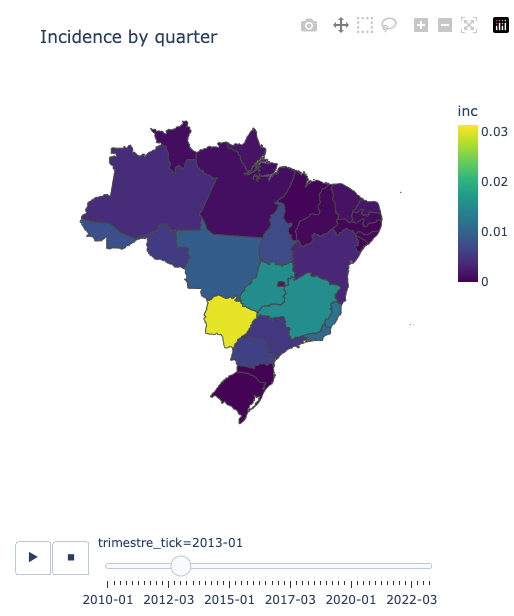

fig = px.choropleth(df, geojson=ufs_json, locations='UF', color='inc',
                               color_continuous_scale="viridis",
                               range_color=(0, max(df.inc)),
                                animation_frame='trimestre_tick',
                                projection ="airy", 
                                width=500,
                               height =600                       )

fig.update_geos(
        visible=False, fitbounds="geojson")
fig.update_layout( 
                     coloraxis_colorbar=dict(len = 0.5, thickness = 20,  y =0.7 ),
                      margin={"r":0, "l":0,"b":0, "autoexpand": True},
title={
                'text': 'Incidence by quarter'})
    
#fig.write_html("plotly_map.html")

Although the animation works well in this case, I could not reduce the distance between the graphics and the sliders.